In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import os

ROOT = Path("")

# 1. Boxplots and accuracy distributions across zoos

In [21]:
result_root = ROOT.joinpath("/netscratch2/jlautz/model_robustness/src/model_robustness/plots")

In [2]:
zoo_path = ROOT.joinpath("/netscratch2/dtaskiran/zoos/MNIST/analysis_data_seed.pt")

ds = torch.load(zoo_path)

In [3]:
a = 0
index_list = [50]
path_list = []
for i in range(len(ds["paths"])):
    if i == 0:
        aux = ds["paths"][i]
        path_list.append(ds["paths"][i])
    
    if ds["paths"][i] == aux:
        pass
    else: 
        a +=1 
        index_list.append(i+50)
        aux = ds["paths"][i]
        path_list.append(aux)

In [4]:
for i in range(len(path_list)):
    path_list[i] = path_list[i].__str__().split("/")[-1]

In [5]:
acc_list = []
for index in index_list:
    acc_list.append(ds["acc"][index])

In [6]:
print(len(acc_list))
print(len(path_list))

1000
1000


In [49]:
# # Change old accuracy values to float for calculations
# for i in range(len(df)):
#     try:
#         df.loc[i, "old_acc"] = float(df.loc[i, "old_acc"])
#     except ValueError:
#         try:
#             df.loc[i, "old_acc"] = float(df.loc[i, "old_acc"][1:5])
#         except ValueError:
#             df.loc[i, "old_acc"] = float(df.loc[i, "old_acc"][1:4])
#     try:
#         df.loc[i, "old_loss"] = float(df.loc[i, "old_loss"])
#     except ValueError:
#         try:
#             df.loc[i, "old_loss"] = float(df.loc[i, "old_loss"][1:5])
#         except ValueError:
#             df.loc[i, "old_loss"] = float(df.loc[i, "old_loss"][1:4])

In [287]:
mnist_df = df[df["dataset"] == "MNIST"]
mnist_df = mnist_df[mnist_df["attack"] == "PGD"]
mnist_df = mnist_df[mnist_df.setup == "hyp-10-f"]
mnist_df = mnist_df[mnist_df["eps"] == 0.1].sort_values(by="name")

In [16]:
df = pd.read_csv("../../data/sparsified/all_results_df.csv")

In [8]:
df = df[df.old_acc>=0.2]

In [15]:
df.head()

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
34210,NN_tune_trainable_from_checkpoint_d5183_00000_...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,sigmoid,0.001,0.9,sgd,0.0001,939951,0.9406,0.9406,0.301190,0.3743
34213,NN_tune_trainable_from_checkpoint_d5183_00003_...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,sigmoid,0.001,0.9,sgd,0.0001,939951,0.5790,0.5790,0.276087,0.1135
34214,NN_tune_trainable_from_checkpoint_d5183_00004_...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,sigmoid,0.001,0.9,sgd,0.0001,939951,0.7639,0.7639,0.340801,0.0980
34217,NN_tune_trainable_from_checkpoint_d5183_00007_...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,sigmoid,0.001,0.9,sgd,0.0001,939951,0.8322,0.8322,0.046604,0.8413
34219,NN_tune_trainable_from_checkpoint_d5183_00009_...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,sigmoid,0.001,0.9,sgd,0.0001,939951,0.8476,0.8476,0.237332,0.0982


In [17]:
df[df.dataset=="CIFAR10"]

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,NN_tune_trainable_from_checkpoint_1ba77_00000_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1000,0.1000,0.296400,0.2201
1,NN_tune_trainable_from_checkpoint_1ba77_00001_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1000,0.1000,0.228231,0.1643
2,NN_tune_trainable_from_checkpoint_1ba77_00003_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1000,0.1000,13.460478,0.1569
3,NN_tune_trainable_from_checkpoint_1ba77_00004_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1000,0.1000,0.409287,0.1000
4,NN_tune_trainable_from_checkpoint_1ba77_00005_...,CIFAR10,PGD,hyp-10-r,0.1,0.0,normal,relu,0.000005,0.9,adam,0.001,518733,0.1000,0.1000,0.223926,0.1441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34205,NN_tune_trainable_from_checkpoint_daad9_00995_...,CIFAR10,FGSM,seed,0.5,0.0,kaiming_uniform,gelu,0.000005,NaN,adam,0.010,964,0.1000,0.1000,0.230590,0.1000
34206,NN_tune_trainable_from_checkpoint_daad9_00996_...,CIFAR10,FGSM,seed,0.5,0.0,kaiming_uniform,gelu,0.000005,NaN,adam,0.010,964,0.1000,0.1000,0.230726,0.1000
34207,NN_tune_trainable_from_checkpoint_daad9_00997_...,CIFAR10,FGSM,seed,0.5,0.0,kaiming_uniform,gelu,0.000005,NaN,adam,0.010,964,0.1000,0.1000,0.230429,0.1000
34208,NN_tune_trainable_from_checkpoint_daad9_00998_...,CIFAR10,FGSM,seed,0.5,0.0,kaiming_uniform,gelu,0.000005,NaN,adam,0.010,964,0.1647,0.1647,0.230665,0.0888


In [12]:
aux_df = df[(df.dataset=="CIFAR10")&(df.attack=="PGD")&(df.setup=="hyp-10-f")]
both_results = pd.DataFrame()
eps = [.1, .2, .3, .4, .5]
for i, e in enumerate(eps):
    
    eps_df = aux_df[aux_df.eps==e].sort_values(by="name").reset_index(drop=True)
    
    if i == 0:
        both_results["normal"] = eps_df["old_acc"]
    both_results[f"eps_{e}"] = eps_df["new_acc"]

<Axes: >

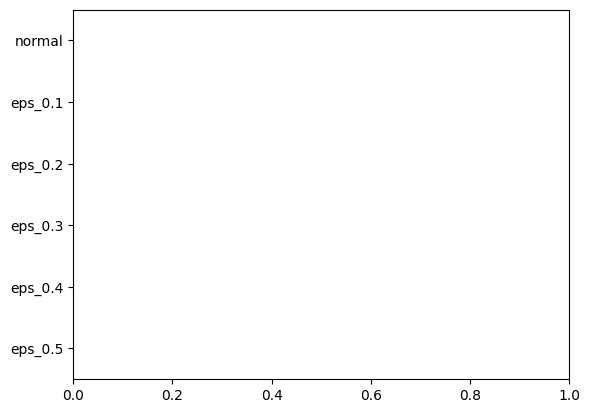

In [13]:
sns.boxplot(both_results, orient="h")

In [8]:
both_results = pd.DataFrame()
both_results["normal_zoo"] = acc_list

In [294]:
mnist_df.head()

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
49158,NN_tune_trainable_from_checkpoint_3b85b_00000_...,MNIST,PGD,hyp-10-f,0.2,0.0,uniform,sigmoid,0.001,0.9,adam,0.0001,9,0.8190,0.8190,0.337292,0.2314
49159,NN_tune_trainable_from_checkpoint_3b85b_00001_...,MNIST,PGD,hyp-10-f,0.2,0.0,uniform,sigmoid,0.001,0.9,adam,0.0001,9,0.8365,0.8365,0.317931,0.0980
49160,NN_tune_trainable_from_checkpoint_3b85b_00002_...,MNIST,PGD,hyp-10-f,0.2,0.0,uniform,sigmoid,0.001,0.9,adam,0.0001,9,0.0980,0.0980,NaN,0.0980
49161,NN_tune_trainable_from_checkpoint_3b85b_00003_...,MNIST,PGD,hyp-10-f,0.2,0.0,uniform,sigmoid,0.001,0.9,adam,0.0001,9,0.1135,0.1135,0.230148,0.1135
49162,NN_tune_trainable_from_checkpoint_3b85b_00004_...,MNIST,PGD,hyp-10-f,0.2,0.0,uniform,sigmoid,0.001,0.9,adam,0.0001,9,0.4438,0.4438,0.241325,0.1028


In [292]:
mnist_df

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
46665,NN_tune_trainable_from_checkpoint_3b85b_00000_...,MNIST,PGD,hyp-10-f,0.1,0.0,uniform,sigmoid,0.0010,0.9,adam,0.0001,9,0.8190,0.8190,0.337160,0.2306
46666,NN_tune_trainable_from_checkpoint_3b85b_00001_...,MNIST,PGD,hyp-10-f,0.1,0.0,uniform,sigmoid,0.0010,0.9,adam,0.0001,9,0.8365,0.8365,0.317928,0.0980
46667,NN_tune_trainable_from_checkpoint_3b85b_00002_...,MNIST,PGD,hyp-10-f,0.1,0.0,uniform,sigmoid,0.0010,0.9,adam,0.0001,9,0.0980,0.0980,NaN,0.0980
46668,NN_tune_trainable_from_checkpoint_3b85b_00003_...,MNIST,PGD,hyp-10-f,0.1,0.0,uniform,sigmoid,0.0010,0.9,adam,0.0001,9,0.1135,0.1135,0.230148,0.1135
46669,NN_tune_trainable_from_checkpoint_3b85b_00004_...,MNIST,PGD,hyp-10-f,0.1,0.0,uniform,sigmoid,0.0010,0.9,adam,0.0001,9,0.4438,0.4438,0.241325,0.1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49153,NN_tune_trainable_from_checkpoint_7c7fb_01042_...,MNIST,PGD,hyp-10-f,0.1,0.0,normal,relu,0.0001,0.9,adam,0.0001,6,0.1135,0.1135,0.230120,0.1135
49154,NN_tune_trainable_from_checkpoint_7c7fb_01043_...,MNIST,PGD,hyp-10-f,0.1,0.0,normal,relu,0.0001,0.9,adam,0.0001,6,0.3944,0.3944,3.911123,0.1135
49155,NN_tune_trainable_from_checkpoint_7c7fb_01044_...,MNIST,PGD,hyp-10-f,0.1,0.0,normal,relu,0.0001,0.9,adam,0.0001,6,0.7890,0.7890,0.393258,0.1135
49156,NN_tune_trainable_from_checkpoint_7c7fb_01045_...,MNIST,PGD,hyp-10-f,0.1,0.0,normal,relu,0.0001,0.9,adam,0.0001,6,0.1135,0.1135,0.230393,0.1135


In [293]:
mnist_df = df[df["dataset"] == "MNIST"]
mnist_df = mnist_df[mnist_df["attack"] == "PGD"]
mnist_df = mnist_df[mnist_df.setup == "hyp-10-f"]
mnist_df = mnist_df[mnist_df["eps"] == 0.2]
#small_df = mnist_df[mnist_df["name"].isin(path_list)].reset_index(drop=True)
# small_df = mnist_df.reset_index(drop=True)
# small_df.sort_values(by="name", key=lambda column:column.map(lambda e: path_list.index(e)), inplace=True)
# small_df = small_df.reset_index(drop=True)

In [27]:
small_df

,Unnamed: 0,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,80866,NN_tune_trainable_c0371_00731_731_seed=732_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,732,0.328,0.901,0.053275,0.8316
1,80865,NN_tune_trainable_c0371_00966_966_seed=967_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,967,0.288,0.910,0.045482,0.8630
2,81663,NN_tune_trainable_c0371_00029_29_seed=30_2021-...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,30,0.254,0.920,0.387950,0.3466
3,80863,NN_tune_trainable_c0371_00479_479_seed=480_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,480,0.285,0.911,0.041556,0.8688
4,80864,NN_tune_trainable_c0371_00408_408_seed=409_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,409,0.261,0.924,0.284128,0.4174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81734,NN_tune_trainable_c0371_00211_211_seed=212_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,212,0.328,0.898,0.051528,0.8320
996,81735,NN_tune_trainable_c0371_00592_592_seed=593_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,593,0.306,0.903,0.055478,0.8277
997,81733,NN_tune_trainable_c0371_00283_283_seed=284_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,284,0.317,0.900,0.043629,0.8605
998,81732,NN_tune_trainable_c0371_00335_335_seed=336_202...,MNIST,PGD,seed,0.5,0.0,uniform,tanh,0.0003,NaN,adam,0.0,336,0.281,0.914,0.079580,0.7724


In [19]:
both_results["eps_0.5"] = small_df["new_acc"]

In [20]:
both_results

,normal_zoo,eps_0.1,eps_0.2,eps_0.3,eps_0.4,eps_0.5
0,0.9021,0.8844,0.8828,0.8815,0.8780,0.8316
1,0.9133,0.8864,0.8827,0.8776,0.8740,0.8630
2,0.9205,0.3737,0.3723,0.3709,0.3668,0.3466
3,0.9118,0.8993,0.8978,0.8933,0.8915,0.8688
4,0.9221,0.4997,0.4951,0.4912,0.4843,0.4174
...,...,...,...,...,...,...
995,0.9012,0.8347,0.8309,0.8261,0.8218,0.8320
996,0.9053,0.8599,0.8552,0.8501,0.8451,0.8277
997,0.9013,0.8834,0.8818,0.8779,0.8766,0.8605
998,0.9142,0.8092,0.8060,0.8032,0.7975,0.7724


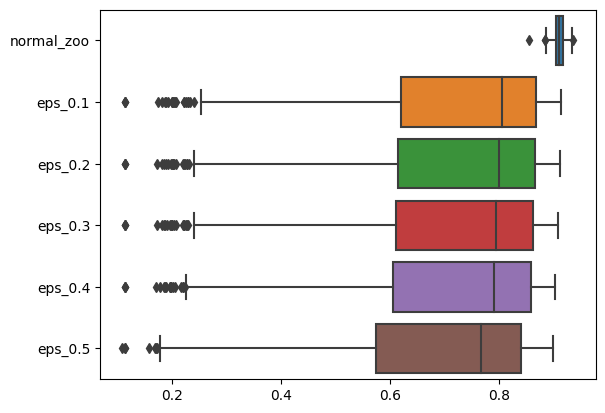

In [26]:
sns.boxplot(both_results, orient="h")
plt.savefig(os.path.join(result_root, "accuracy_boxplots/MNIST_PGD_seed_boxplot.png"), bbox_inches="tight")
plt.show()


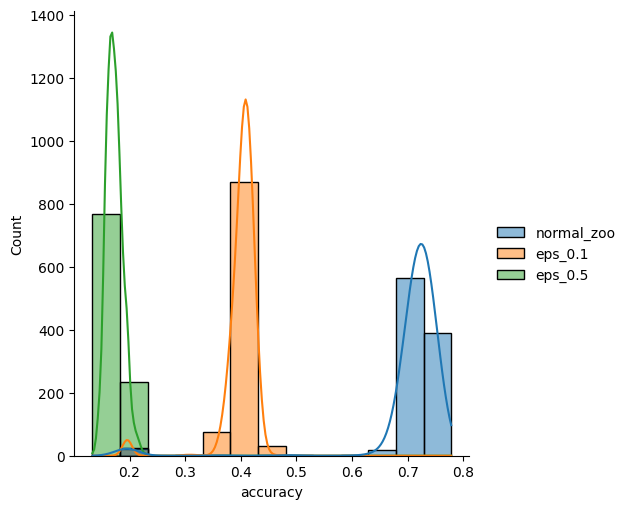

In [385]:
sns.displot(data=both_results[["normal_zoo", "eps_0.1", "eps_0.5"]], kde=True)
plt.xlabel("accuracy")
plt.show()

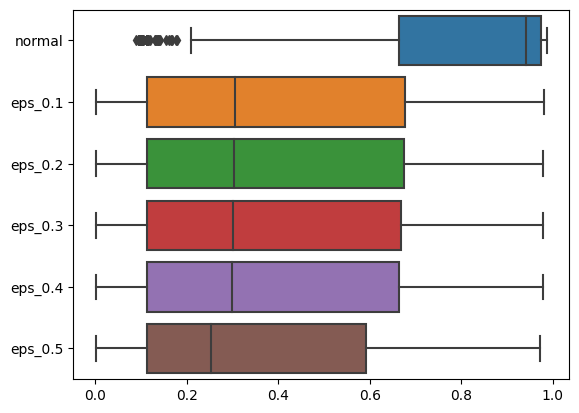

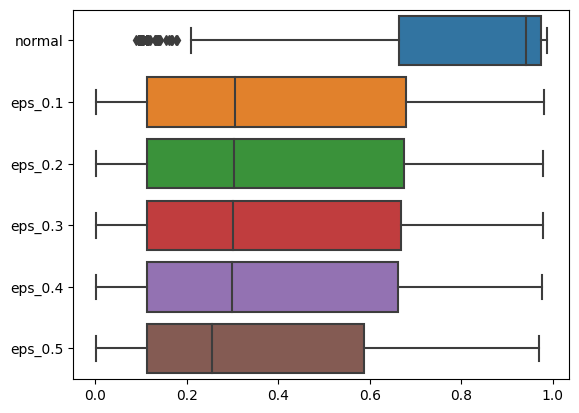

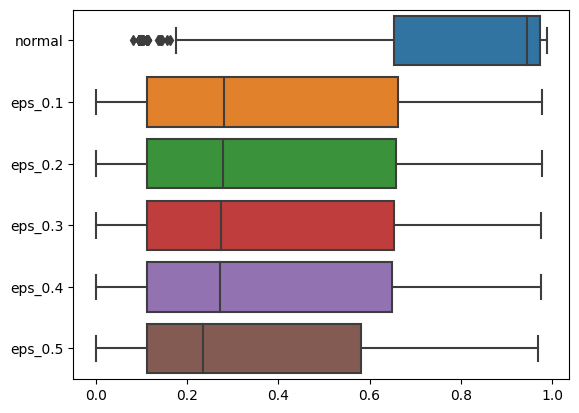

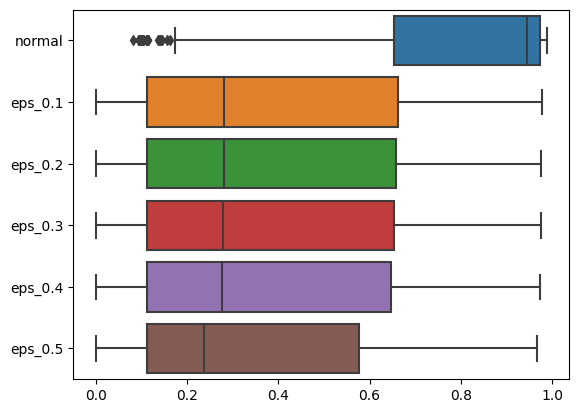

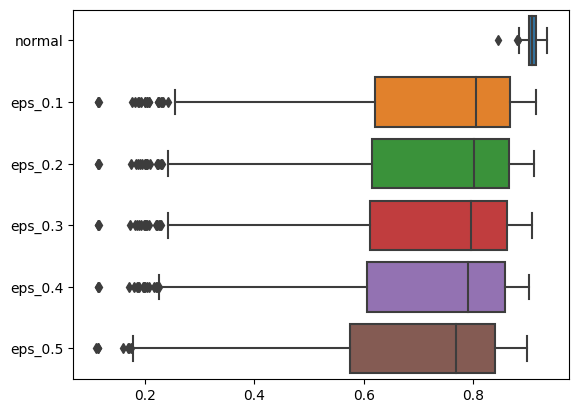

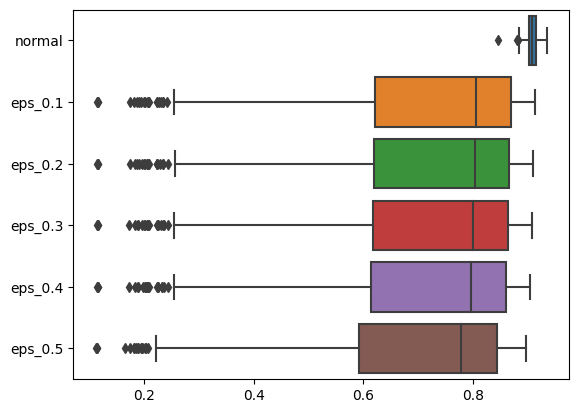

In [46]:
ROOT = Path("")

# Define parameters
datasets = ["MNIST", "CIFAR10", "SVHN"]
attacks = ["PGD", "FGSM"]
setups = ["hyp-10-f", "hyp-10-r", "seed"]
eps = [.1, .2, .3, .4, .5]

# Define paths
result_root = ROOT.joinpath("/netscratch2/jlautz/model_robustness/src/model_robustness/plots")
zoo_root = ROOT.joinpath("/ds2/model_zoos/zoos_v2/")
df = pd.read_csv("/netscratch2/jlautz/model_robustness/src/model_robustness/data/all_results.csv")

def get_names_for_path(dataset, setup):

    if setup == "hyp-10-r":
        abbreviated = "hyp_rand"
    elif setup == "hyp-10-f":
        abbreviated = "hyp_fix"
    else:
        abbreviated = "seed"

    if dataset == "CIFAR10":
        p = f"large/analysis_data_{abbreviated}.pt"
    else:
        p = f"analysis_data_{abbreviated}.pt"
    
    return p


# Big Loop
for ds in datasets:
    for setup in setups:
        for attack in attacks:
        
            aux_df = df[(df.dataset == ds) & (df.attack == attack) & (df.setup == setup)]
            both_results = pd.DataFrame()

            for i, e in enumerate(eps):

                eps_df = aux_df[aux_df.eps == e].sort_values(by="name").reset_index(drop=True)
                
                both_results["normal"] = eps_df["old_acc"]
                both_results[f"eps_{e}"] = eps_df["new_acc"]

            sns.boxplot(both_results, orient="h")
            plt.show()
            

    break

In [42]:
both_results["eps_"]

,normal,eps_0.1,eps_0.2,eps_0.3,eps_0.4,eps_0.5
40224,NaN,0.5193,NaN,NaN,NaN,NaN
40698,NaN,0.1135,NaN,NaN,NaN,NaN
40534,NaN,0.7099,NaN,NaN,NaN,NaN
39708,NaN,0.0982,NaN,NaN,NaN,NaN
38421,NaN,0.7112,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
40437,NaN,0.1135,NaN,NaN,NaN,NaN
38973,NaN,0.9441,NaN,NaN,NaN,NaN
39840,NaN,0.0176,NaN,NaN,NaN,NaN
38924,NaN,0.7716,NaN,NaN,NaN,NaN


In [43]:
eps_df

,Unnamed: 0,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
49890,49890,NN_tune_trainable_b6a12_00000_0_model::dropout...,MNIST,PGD,hyp-10-f,0.5,0.0,uniform,tanh,0.0010,0.9,adam,0.0010,1,0.061,0.982,0.213802,0.4470
50822,50822,NN_tune_trainable_b6a12_00001_1_model::dropout...,MNIST,PGD,hyp-10-f,0.5,0.5,uniform,tanh,0.0010,0.9,adam,0.0010,1,0.143,0.958,0.464528,0.1135
50996,50996,NN_tune_trainable_b6a12_00002_2_model::dropout...,MNIST,PGD,hyp-10-f,0.5,0.0,normal,tanh,0.0010,0.9,adam,0.0010,1,0.059,0.984,0.111677,0.6236
50383,50383,NN_tune_trainable_b6a12_00003_3_model::dropout...,MNIST,PGD,hyp-10-f,0.5,0.5,normal,tanh,0.0010,0.9,adam,0.0010,1,0.139,0.956,0.396591,0.0977
49168,49168,NN_tune_trainable_b6a12_00004_4_model::dropout...,MNIST,PGD,hyp-10-f,0.5,0.0,kaiming_uniform,tanh,0.0010,0.9,adam,0.0010,1,0.058,0.983,0.123276,0.6535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51097,51097,NN_tune_trainable_b6a12_02555_2555_model::drop...,MNIST,PGD,hyp-10-f,0.5,0.5,normal,gelu,0.0001,0.9,sgd,0.0001,10,2.301,0.113,0.230123,0.1135
48721,48721,NN_tune_trainable_b6a12_02556_2556_model::drop...,MNIST,PGD,hyp-10-f,0.5,0.0,kaiming_uniform,gelu,0.0001,0.9,sgd,0.0001,10,0.062,0.980,0.044872,0.9008
50358,50358,NN_tune_trainable_b6a12_02557_2557_model::drop...,MNIST,PGD,hyp-10-f,0.5,0.5,kaiming_uniform,gelu,0.0001,0.9,sgd,0.0001,10,0.300,0.922,0.351197,0.0381
48684,48684,NN_tune_trainable_b6a12_02558_2558_model::drop...,MNIST,PGD,hyp-10-f,0.5,0.0,kaiming_normal,gelu,0.0001,0.9,sgd,0.0001,10,0.078,0.976,0.088735,0.6652


# 2. Pairplots

In [174]:
# Defining combinations of models
# [nlin, optimizer]
combinations = [["tanh", "sgd"],
                ["tanh", "adam"],
                ["relu", "sgd"],
                ["relu", "adam"],
                ["gelu", "sgd"],
                ["gelu", "adam"],
                ["sigmoid", "sgd"],
                ["sigmoid", "adam"]]

In [521]:
pair_df = df[(df.dataset=="MNIST") & (df.attack=="PGD") & (df["setup"]=="hyp-10-r") & (df["eps"] == 0.1)]
new_df = pd.DataFrame()

for i, combination in enumerate(combinations):
    aux_df = pair_df[(pair_df.nlin == combination[0]) & (pair_df.optimizer == combination[1])][["new_acc", "old_acc"]]
    aux_df["combination"] = i
    aux_df["part_of"] = "same_params"
    new_df = pd.concat([new_df, aux_df])
    
    other_df = pair_df[(pair_df.nlin != combination[0]) | (pair_df.optimizer != combination[1])][["new_acc", "old_acc"]]
    other_df["combination"] = i
    other_df["part_of"] = "other"
    new_df = pd.concat([new_df, other_df])
    break

In [522]:
new_df

,new_acc,old_acc,combination,part_of
0,0.3051,0.979,0,same_params
12,0.0974,0.953,0,same_params
16,0.7095,0.855,0,same_params
29,0.1028,0.144,0,same_params
31,0.7052,0.744,0,same_params
...,...,...,...,...
2553,0.9094,0.964,0,other
2555,0.5037,0.766,0,other
2556,0.1135,0.113,0,other
2557,0.1135,0.113,0,other


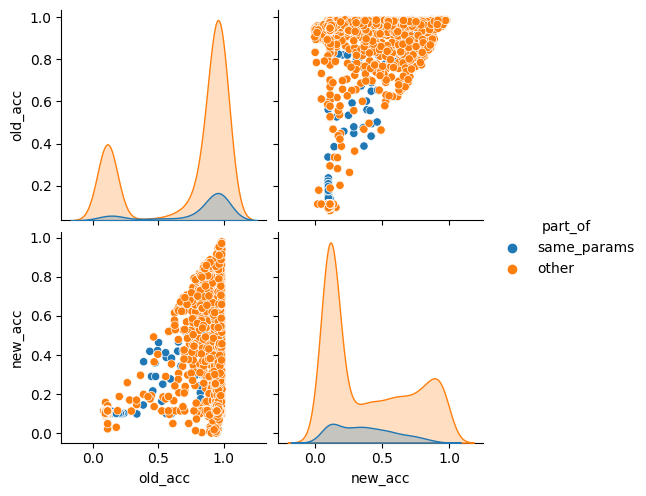

In [523]:
sns.pairplot(new_df[["old_acc", "new_acc", "part_of"]], hue="part_of")
plt.show()

In [169]:
pair_df = df[(df.dataset=="MNIST") & (df.attack=="PGD") & (df["setup"]=="hyp-10-r")]
pair_df = pair_df[["init_type", "nlin", "optimizer", "new_acc", "eps", "dropout", "lr"]]

In [170]:
pair_df.head()

,init_type,nlin,optimizer,new_acc,eps,dropout,lr
0,kaiming_normal,tanh,sgd,0.3051,0.1,0.0,0.0010
1,kaiming_normal,relu,adam,0.8454,0.1,0.0,0.0001
2,normal,relu,sgd,0.1135,0.1,0.0,0.0001
3,kaiming_normal,tanh,adam,0.2168,0.1,0.5,0.0010
4,normal,relu,sgd,0.1135,0.1,0.0,0.0010


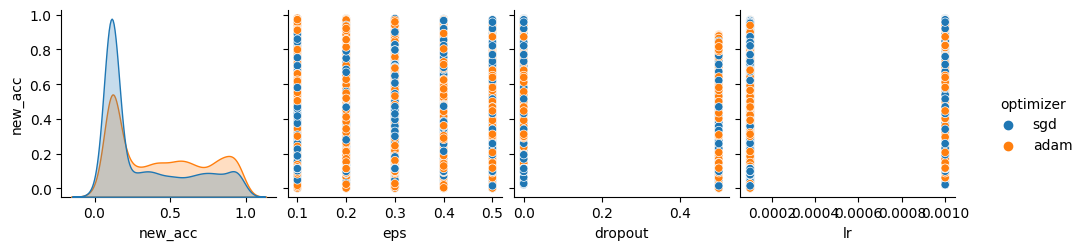

In [172]:
sns.pairplot(pair_df,
            hue="optimizer",
            x_vars=["new_acc", "eps", "dropout", "lr"],
            y_vars=["new_acc"])
plt.show()

In [147]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [148]:
pair_df.head()

,eps,init_type,nlin,optimizer,new_acc


# 3. Kendall's Tau

In [6]:
df = pd.read_csv("../../data/all_results.csv")

In [7]:
zoo_path = ROOT.joinpath("/netscratch2/dtaskiran/zoos/CIFAR10/large/analysis_data_hyp_rand.pt")

ds = torch.load(zoo_path)

In [8]:
a = 0
index_list = [50]
path_list = []
for i in range(len(ds["paths"])):
    if i == 0:
        aux = ds["paths"][i]
        path_list.append(ds["paths"][i])
    
    if ds["paths"][i] == aux:
        pass
    else: 
        a +=1 
        index_list.append(i+50)
        aux = ds["paths"][i]
        path_list.append(aux)

In [9]:
paths = []
for i in range(len(path_list)):
    path_list[i] = path_list[i].__str__().split("/")[-1]
    paths.append(path_list[i].split("_")[5])
    
acc_list = []
for index in index_list:
    acc_list.append(ds["acc"][index])

In [721]:
normal_df = pd.DataFrame()
normal_df["name"] = paths
normal_df["acc"] = acc_list
#normal_df["order"] = pd.cut(acc_list, 10, labels=[10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
normal_df = normal_df.sort_values("acc", ascending=False)
normal_df.insert(0, "order", range(1, 1+len(normal_df)))

In [722]:
normal_df.head()

,order,name,acc
984,1,94,0.6981
936,2,604,0.6974
819,3,1132,0.6969
685,4,220,0.6968
706,5,986,0.6960


In [12]:
len(path_list)

1280

In [768]:
# Getting the correct data from the full results table
mnist_df = df[df["dataset"] == "CIFAR10"]
mnist_df = mnist_df[mnist_df["attack"] == "PGD"]
mnist_df = mnist_df[mnist_df.setup == "hyp-10-r"]
mnist_df = mnist_df[mnist_df["eps"] == 0.1]

# Making sure that the names of the models match and put them in the same order as normal_df
perturbed_df = mnist_df[mnist_df["name"].isin(path_list)].reset_index(drop=True)
perturbed_df.sort_values(by="name", key=lambda column:column.map(lambda e: path_list.index(e)), inplace=True)
perturbed_df = perturbed_df.reset_index(drop=True)
perturbed_df = perturbed_df[["name", "new_acc"]]

# Replace full path name with shorter name
for i, path in enumerate(paths):
    aux = perturbed_df.loc[i, "name"].split("_")[5]
    if path == aux:
        perturbed_df.loc[i, "name"] = path
    else:
        print(f"Error at index {i}.")

#perturbed_df["order"] = pd.cut(perturbed_df["new_acc"], 10, labels=[10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
perturbed_df = perturbed_df.sort_values("new_acc", ascending=False)
perturbed_df.insert(0, "order", range(1, 1+len(perturbed_df)))

aux_list = list(normal_df["name"])
perturbed_df.sort_values(by="name", key=lambda column:column.map(lambda e: aux_list.index(e)), inplace=True)

# Calculating kendall's tau
tau, p_value = stats.kendalltau(normal_df["order"], perturbed_df["order"])
print(f"Tau-value: {tau}, p-value: {p_value}")

Tau-value: 0.6884015832681782, p-value: 5.970526941815745e-298


In [725]:
tau, p_value = stats.kendalltau(normal_df["order"], perturbed_df["order"])
print(tau)
print(p_value)

-0.06206896551724138
0.6455245462063907


/tmp/ipykernel_1701/1910154815.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  tau, p_value = stats.kendalltau(normal_df["order"][:30], perturbed_df["order"][:30])


In [758]:
# # Code for top x models only
# mnist_df = df[df["dataset"] == "CIFAR10"]
# mnist_df = mnist_df[mnist_df["attack"] == "PGD"]
# mnist_df = mnist_df[mnist_df.setup == "hyp-10-r"]
# mnist_df = mnist_df[mnist_df["eps"] == 0.1]

# perturbed_df = mnist_df[mnist_df["name"].isin(path_list)].reset_index(drop=True)
# perturbed_df.sort_values(by="name", key=lambda column:column.map(lambda e: path_list.index(e)), inplace=True)
# perturbed_df = perturbed_df.reset_index(drop=True)
# perturbed_df["name"] = paths
# perturbed_df = perturbed_df[["name", "new_acc"]]
# aux_list = list(normal_df["name"].iloc[:30])
# perturbed_df = perturbed_df[perturbed_df["name"].isin(aux_list)].reset_index(drop=True)
# perturbed_df = perturbed_df.sort_values("new_acc", ascending=False)
# perturbed_df.insert(0, "order", range(1, 1+len(perturbed_df)))

# perturbed_df.sort_values(by="name", key=lambda column:column.map(lambda e: aux_list.index(e)), inplace=True)

# tau, p_value = stats.kendalltau(list(normal_df["order"].iloc[:30]), list(perturbed_df["order"]))
# print(tau)
# print(p_value)

-0.06206896551724138
0.6455245462063907


In [687]:
y = [1,2,3,4]
z = [3,1,2,4]

tau, p_value = stats.kendalltau(y, z)
print(tau)
print(p_value)

0.3333333333333334
0.75


# 4. Plotting Delta Distribution

In [955]:
df = pd.read_csv("../data/all_results.csv", index_col=0)

In [956]:
df.head()

,name,dataset,attack,setup,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,NN_tune_trainable_a17ed_00710_710_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,tanh,0.0010,0.9,sgd,0.0001,674695,0.067,0.979,0.378464,0.3051
1,NN_tune_trainable_a17ed_00686_686_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.0,kaiming_normal,relu,0.0001,0.9,adam,0.0001,486815,0.054,0.984,0.056045,0.8454
2,NN_tune_trainable_a17ed_01002_1002_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,relu,0.0001,0.9,sgd,0.0001,162638,2.301,0.113,0.230108,0.1135
3,NN_tune_trainable_a17ed_00775_775_model::dropo...,MNIST,PGD,hyp-10-r,0.1,0.5,kaiming_normal,tanh,0.0010,0.9,adam,0.0010,651635,0.134,0.960,0.296555,0.2168
4,NN_tune_trainable_a17ed_01098_1098_model::drop...,MNIST,PGD,hyp-10-r,0.1,0.0,normal,relu,0.0010,0.9,sgd,0.0010,361619,2.301,0.113,0.230111,0.1135


In [957]:
for i in range(len(df)):
    df.loc[i, "delta"] = df.loc[i, 'old_acc'] - df.loc[i, "new_acc"]

In [1021]:
mnist_df = df[df["dataset"] == "SVHN"]
mnist_df = mnist_df[mnist_df["attack"] == "PGD"]
mnist_df = mnist_df[mnist_df.setup == "hyp-10-r"]
# mnist_df = mnist_df[mnist_df["eps"] == 0.1]

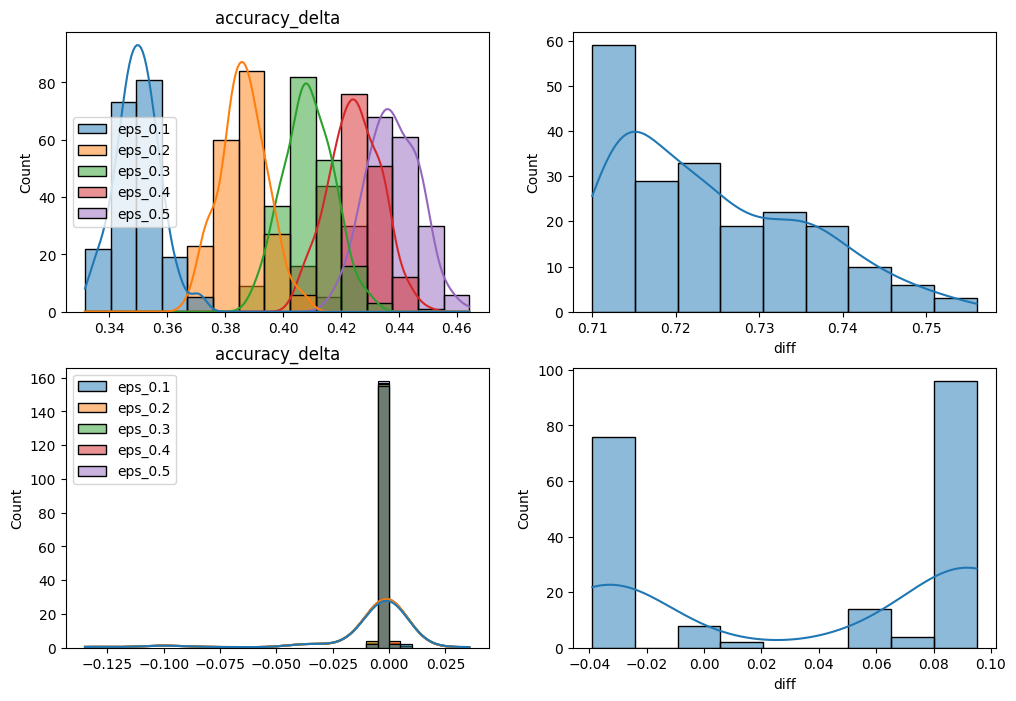

In [929]:
figure, axis = plt.subplots(2, 2, figsize=(12,8))
epsilons = [.1, .2, .3 , .4, .5]
#epsilons = [.1, .5]

for i in range(2):
    data = pd.DataFrame()

    for eps in epsilons:
        aux_df = mnist_df[mnist_df["eps"] == eps].reset_index(drop=False).sort_values(by="old_acc", ascending=False)
        if i == 0:
            aux_df = aux_df.iloc[:200, :]
        elif i == 1:
            aux_df = aux_df.iloc[-200:, :]
        data[f"eps_{eps}"] = aux_df[aux_df["eps"] == eps].reset_index(drop=False)["delta"]
        aux_df["diff"] = aux_df["old_acc"] - 0.1
        data["diff"] = aux_df[aux_df["eps"] == eps].reset_index(drop=False)["diff"]
    aux_list = list(data.columns)
    aux_list.remove("diff")
    if i == 0:
        sns.histplot(ax=axis[i, 0], data=data[aux_list], kde=True)
    elif i == 1:
        sns.histplot(ax=axis[i,0], data=data[aux_list], kde=True, bins=[-0.01, -0.005, 0, 0.005, 0.01])
    axis[i, 0].set_title("accuracy_delta")
    sns.histplot(ax=axis[i, 1], data=data["diff"], kde=True)
    #axis[i, 1].set_title("diff to random_guessing")
    
plt.show()

In [816]:
epsilons = [.1, .2, .3 , .4, .5]
data = pd.DataFrame()

for eps in epsilons:
    aux_df = mnist_df[mnist_df["eps"] == eps].reset_index(drop=False).sort_values(by="old_acc", ascending=False)
    aux_df = aux_df.iloc[:50, :]
    data[f"eps_{eps}"] = aux_df[aux_df["eps"] == eps].reset_index(drop=False)["delta"]


In [803]:
epsilons = [.1, .2, .3 , .4, .5]
data = pd.DataFrame()

for eps in epsilons:
    data[f"eps_{eps}"] = mnist_df[mnist_df["eps"] == eps].reset_index(drop=False)["delta"]
    

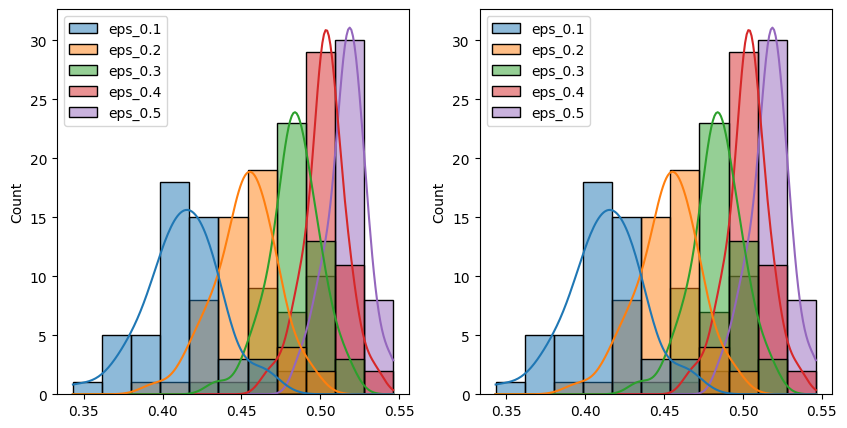

In [831]:
figure, axis = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(ax=axis[0], data=data, kde=True)
sns.histplot(ax=axis[1], data=data, kde=True)
plt.show()

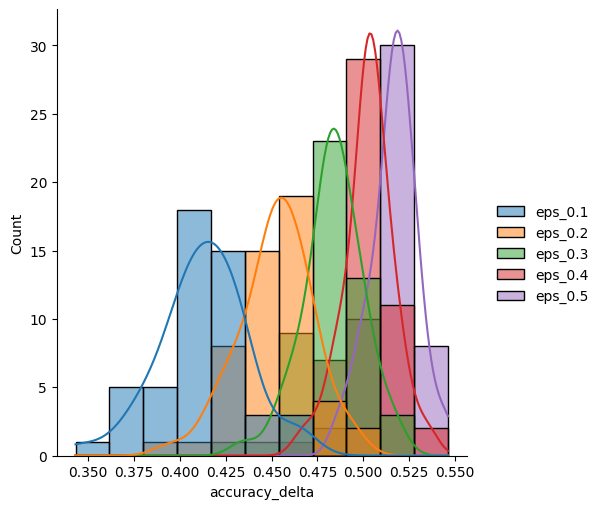

In [818]:
sns.displot(data=data, kde=True)
plt.xlabel("accuracy_delta")
plt.show()

In [805]:
data

,eps_0.1,eps_0.2,eps_0.3,eps_0.4,eps_0.5
0,0.330270,0.378128,0.439141,0.562572,0.532254
1,0.323570,0.406958,0.416211,0.471346,0.545286
2,0.337058,0.386820,0.490654,0.512325,0.512308
3,0.321104,0.381695,0.447767,0.513909,0.514920
4,0.334603,-0.000874,0.485778,0.467707,0.499983
...,...,...,...,...,...
995,0.303766,0.314144,0.507253,0.471015,0.545677
996,0.342711,0.407523,0.445810,0.539019,0.555940
997,0.353856,0.391616,0.490398,0.552605,0.558825
998,0.301845,0.392712,0.454224,0.509536,0.546408


# 5. Transferability

In [1047]:
df = pd.read_csv("../data/all_results.csv", index_col=0)

In [1048]:
for i in range(len(df)):
    df.loc[i, "delta"] = df.loc[i, 'old_acc'] - df.loc[i, "new_acc"]

In [1205]:
# Define parameters
attack = "PGD"
data_path = "CIFAR10/large"
dataset = "CIFAR10"
setup = "hyp-10-r"

In [1206]:
model_list_path = os.path.join(f"../data/{data_path}/{attack}/{setup}/model_list.txt")

In [1207]:
with open(model_list_path, "r") as items:
    model_paths = items.readlines()

    for i, l in enumerate(model_paths):
        model_paths[i] = l.replace("\n", "")

In [1208]:
temp_df = df[df["dataset"] == dataset]
temp_df = temp_df[temp_df["attack"] == attack]
temp_df = temp_df[temp_df.setup == setup]
temp_df = temp_df[temp_df["eps"] == 0.1]

In [1221]:
including = temp_df[temp_df["name"].isin(model_paths)]
not_including = temp_df[~temp_df["name"].isin(model_paths)][:50]

In [1222]:
print("Including Mean: ", including.delta.mean(), including.delta.std())
print("Not Including Mean", not_including.delta.mean(), not_including.delta.std())
print("Old Acc Mean (Incl.): ", including.old_acc.mean())
print("Old Acc Mean (Not incl.): ", not_including.old_acc.mean())

Including Mean:  0.147834 0.16004044209549798
Not Including Mean 0.205238 0.16821322339973935
Old Acc Mean (Incl.):  0.31058
Old Acc Mean (Not incl.):  0.3880800000000001


In [1223]:
stats.kstest(including["old_acc"], not_including["old_acc"])

KstestResult(statistic=0.2, pvalue=0.2719135601522248)

## 5.2. T-Test to compare performances

In [1238]:
# Define parameters
datasets = ["MNIST", "CIFAR10/large", "SVHN"]
data = ["MNIST", "CIFAR10", "SVHN"]
setups = ["hyp-10-r", "hyp-10-f", "seed"]
attacks = ["PGD"]
epsilons = [.1, .2, .3, .4, .5]

for attack in attacks:
    for j, ds in enumerate(datasets):
        for setup in setups:
            for eps in epsilons:
                
                # read in model_list
                model_list_path = os.path.join(f"../data/{ds}/{attack}/{setup}/model_list.txt")
                with open(model_list_path, "r") as items:
                    model_paths = items.readlines()

                    for i, l in enumerate(model_paths):
                        model_paths[i] = l.replace("\n", "")
                    
                # define dataframe
                temp_df = df[df["dataset"] == data[j]]
                temp_df = temp_df[temp_df["attack"] == attack]
                temp_df = temp_df[temp_df.setup == setup]
                temp_df = temp_df[temp_df["eps"] == eps]
                
                including = temp_df[temp_df["name"].isin(model_paths)]
                not_including = temp_df[~temp_df["name"].isin(model_paths)]
                
                _, p_value = stats.ttest_ind(including.delta, not_including.delta)
                
                print(f"[{data[j]}] - [{setup}] - [{eps}]: p_value = {p_value}")

[MNIST] - [hyp-10-r] - [0.1]: p_value = 0.14024907898796654
[MNIST] - [hyp-10-r] - [0.2]: p_value = 0.14379327705389613
[MNIST] - [hyp-10-r] - [0.3]: p_value = 0.14664637893002086
[MNIST] - [hyp-10-r] - [0.4]: p_value = 0.15013559713179656
[MNIST] - [hyp-10-r] - [0.5]: p_value = 0.19666867033840316
[MNIST] - [hyp-10-f] - [0.1]: p_value = 0.1078288567750132
[MNIST] - [hyp-10-f] - [0.2]: p_value = 0.10661002274395147
[MNIST] - [hyp-10-f] - [0.3]: p_value = 0.10412559076730336
[MNIST] - [hyp-10-f] - [0.4]: p_value = 0.10274011880356794
[MNIST] - [hyp-10-f] - [0.5]: p_value = 0.10491419182577331
[MNIST] - [seed] - [0.1]: p_value = 0.6612191461518389
[MNIST] - [seed] - [0.2]: p_value = 0.6334619630257692
[MNIST] - [seed] - [0.3]: p_value = 0.6119505280766542
[MNIST] - [seed] - [0.4]: p_value = 0.5883869768427026
[MNIST] - [seed] - [0.5]: p_value = 0.39613319132296076
[CIFAR10] - [hyp-10-r] - [0.1]: p_value = 0.03378813343043558
[CIFAR10] - [hyp-10-r] - [0.2]: p_value = 0.03633619985111674
[

In [1236]:
stats.ttest_ind(including.delta, not_including.delta)

Ttest_indResult(statistic=0.5408849923361038, pvalue=0.5887075554361142)

In [1234]:
not_including.delta.mean()

0.5412873202212661

In [1235]:
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=1.099305186099593, pvalue=0.30361296704535845)

# 6. Scatterplot for kendall's tau

In [96]:
data = pd.read_csv("../../data/resnet/all_results_resnet_df.csv")

In [97]:
data.head()

,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc
0,NN_tune_trainable_0ecbc_00414_414_seed=415_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,415,0.303,0.921,0.019875,0.2643
1,NN_tune_trainable_0ecbc_00977_977_seed=978_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,978,0.295,0.925,0.019699,0.2545
2,NN_tune_trainable_0ecbc_00214_214_seed=215_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,215,0.300,0.922,0.020788,0.2602
3,NN_tune_trainable_0ecbc_00594_594_seed=595_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,595,0.307,0.920,0.020801,0.2537
4,NN_tune_trainable_0ecbc_00444_444_seed=445_202...,CIFAR10,PGD,0.1,0.0,kaiming_uniform,relu,0.05,0.9,sgd,0.0005,445,0.310,0.920,0.019009,0.2928


In [115]:
ds = "TinyImageNet"
attack = "PGD"
#setup = "hyp-10-f"
eps = 0.1

In [123]:
df

,level_0,name,dataset,attack,eps,dropout,init_type,nlin,lr,momentum,optimizer,wd,seed,old_loss,old_acc,new_loss,new_acc,index,top_200
201,20000,NN_tune_trainable_dbca4_00886_886_seed=887_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,887,1.841,0.568,0.046179,0.0860,20000,False
190,20001,NN_tune_trainable_dbca4_00054_54_seed=55_2022-...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,55,1.816,0.568,0.046654,0.0822,20001,True
43,20002,NN_tune_trainable_dbca4_00269_269_seed=270_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,270,1.792,0.574,0.046135,0.0855,20002,True
957,20003,NN_tune_trainable_dbca4_00745_745_seed=746_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,746,1.937,0.547,0.045715,0.0951,20003,False
744,20004,NN_tune_trainable_dbca4_00385_385_seed=386_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,386,1.908,0.558,0.045624,0.0903,20004,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,20998,NN_tune_trainable_dbca4_00460_460_seed=461_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,461,1.896,0.557,0.046801,0.0821,20998,False
109,20999,NN_tune_trainable_dbca4_00324_324_seed=325_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,325,1.810,0.571,0.046489,0.0861,20999,True
351,21000,NN_tune_trainable_dbca4_00199_199_seed=200_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,200,1.835,0.565,0.046906,0.0892,21000,False
743,21001,NN_tune_trainable_dbca4_00438_438_seed=439_202...,TinyImageNet,PGD,0.1,0.0,kaiming_uniform,relu,0.1,0.9,sgd,0.0005,439,1.865,0.558,0.048133,0.0843,21001,False


In [116]:
df = data[(data.dataset==ds) & (data.attack==attack) & (data.eps==eps)]

In [117]:
df["index"] = df.index

/tmp/ipykernel_397/669543359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["index"] = df.index


In [118]:
df = df.sort_values(by="old_acc", ascending=False).reset_index()

In [119]:
df["top_200"] = False

In [120]:
for i in range(200):
    df.loc[i, "top_200"] = True

In [121]:
df = df.sort_values(by="index")

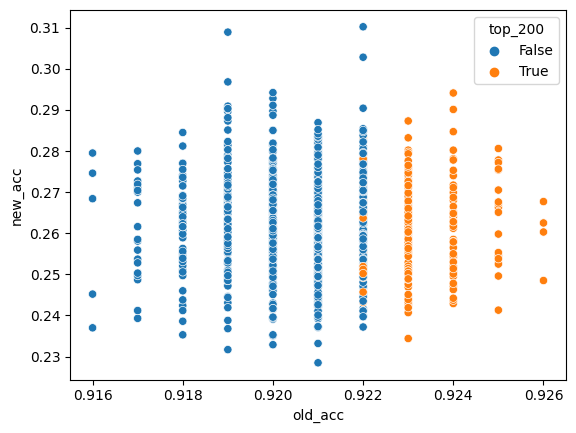

In [106]:
g = sns.scatterplot(df, x="old_acc", y="new_acc", hue="top_200")
# Draw a line of x=y 
# x0, x1 = g.get_xlim()
# y0, y1 = g.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# g.plot(lims, lims, '-k')
plt.show()

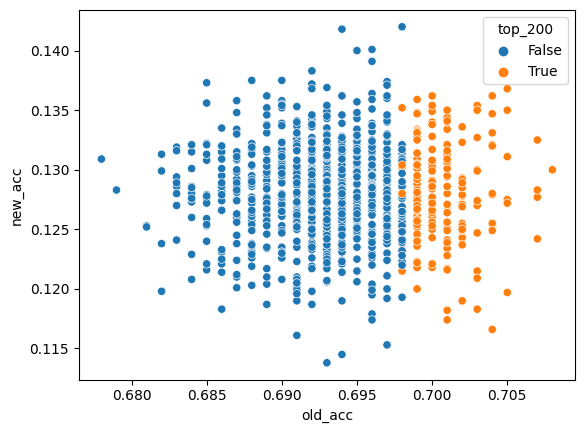

In [114]:
g = sns.scatterplot(df, x="old_acc", y="new_acc", hue="top_200")
# Draw a line of x=y 
# x0, x1 = g.get_xlim()
# y0, y1 = g.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# g.plot(lims, lims, '-k')
plt.show()

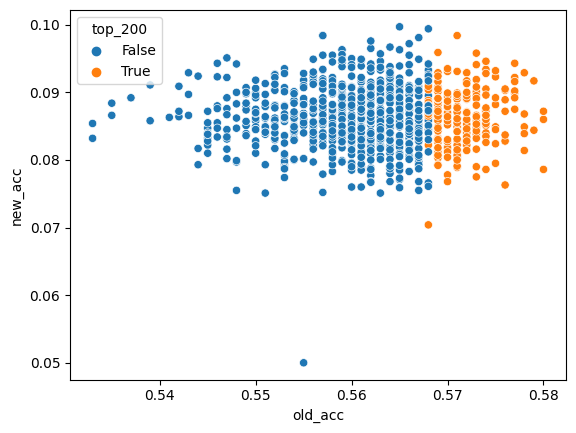

In [122]:
g = sns.scatterplot(df, x="old_acc", y="new_acc", hue="top_200")
# Draw a line of x=y 
# x0, x1 = g.get_xlim()
# y0, y1 = g.get_ylim()
# lims = [max(x0, y0), min(x1, y1)]
# g.plot(lims, lims, '-k')
plt.show()

# 7. Clusters of Hyperparameters

## 7.1. Plots

In [271]:
data = pd.read_csv("../../data/all_results.csv", index_col=0)

In [274]:
ds = "MNIST"
ds_list = ["MNIST", "CIFAR10", "SVHN"]
attack = "PGD"
setup = "hyp-10-f"
eps = 0.1

df_mnist = data[(data.dataset==ds_list[0]) & (data.attack==attack) & (data.eps==eps)]# & (data.setup==setup)]
df_cifar = data[(data.dataset==ds_list[1]) & (data.attack==attack) & (data.eps==eps)]# & (data.setup==setup)]
df_svhn = data[(data.dataset==ds_list[2]) & (data.attack==attack) & (data.eps==eps)]# & (data.setup==setup)]

In [283]:
df_svhn.optimizer.value_counts()

sgd     8640
adam    1000
Name: optimizer, dtype: int64

In [241]:
# # Comment in to get plots for top half of zoo
# df_mnist = df_mnist.sort_values(by="old_acc", ascending=False).iloc[:int(100), :]
# df_cifar = df_cifar.sort_values(by="old_acc", ascending=False).iloc[:int(100), :]
# df_svhn = df_svhn.sort_values(by="old_acc", ascending=False).iloc[:int(100), :]

In [276]:
df1 = df_mnist[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "old_acc"]].reset_index(drop=True)
df2 = df_mnist[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "new_acc"]].reset_index(drop=True)
df1["attack"] = "before"
df2["attack"] = "after"
df1 = df1.rename(columns={"old_acc": "accuracy"})
df2 = df2.rename(columns={"new_acc": "accuracy"})
df_mnist2 = pd.concat([df1, df2])

In [277]:
df1 = df_cifar[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "old_acc"]].reset_index(drop=True)
df2 = df_cifar[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "new_acc"]].reset_index(drop=True)
df1["attack"] = "before"
df2["attack"] = "after"
df1 = df1.rename(columns={"old_acc": "accuracy"})
df2 = df2.rename(columns={"new_acc": "accuracy"})
df_cifar2 = pd.concat([df1, df2])

In [278]:
df1 = df_svhn[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "old_acc"]].reset_index(drop=True)
df2 = df_svhn[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "new_acc"]].reset_index(drop=True)
df1["attack"] = "before"
df2["attack"] = "after"
df1 = df1.rename(columns={"old_acc": "accuracy"})
df2 = df2.rename(columns={"new_acc": "accuracy"})
df_svhn2 = pd.concat([df1, df2])

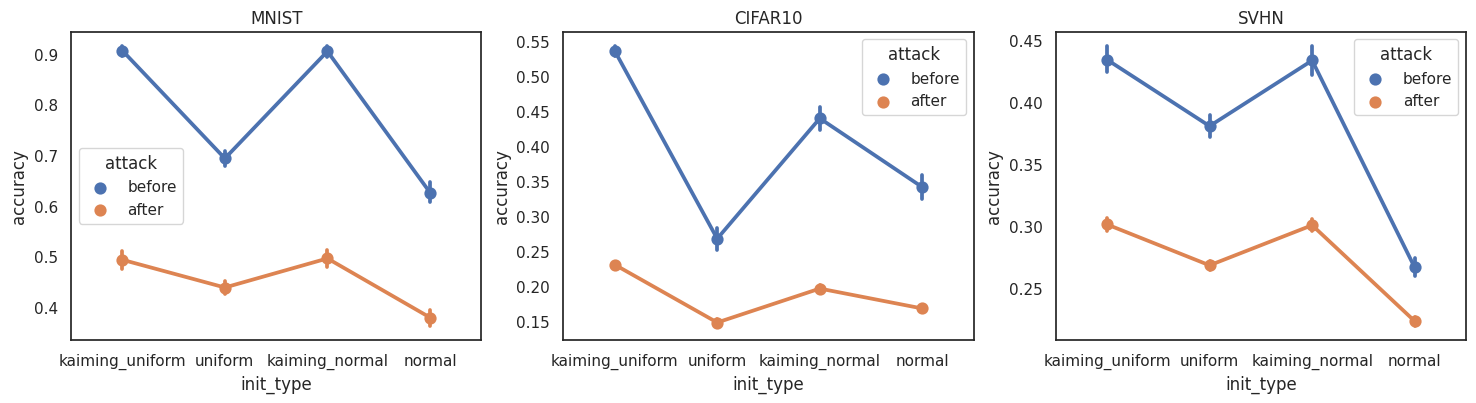

In [279]:
figure, axis = plt.subplots(1, 3, figsize=(18,4))

variable = "init_type"
order = ["kaiming_uniform", "uniform", "kaiming_normal", "normal"]

# sns.set_theme(style="white", font_scale=1.0)
g1 = sns.pointplot(ax=axis[0], data=df_mnist2, x=variable, y="accuracy", hue="attack", order=order)
g1.set_title(ds_list[0])
g2 = sns.pointplot(ax=axis[1], data=df_cifar2, x=variable, y="accuracy", hue="attack", order=order)
g2.set_title(ds_list[1])
g3 = sns.pointplot(ax=axis[2], data=df_svhn2, x=variable, y="accuracy", hue="attack", order=order)
g3.set_title(ds_list[2])
# g1.tick_params(labelsize=7)
plt.show()

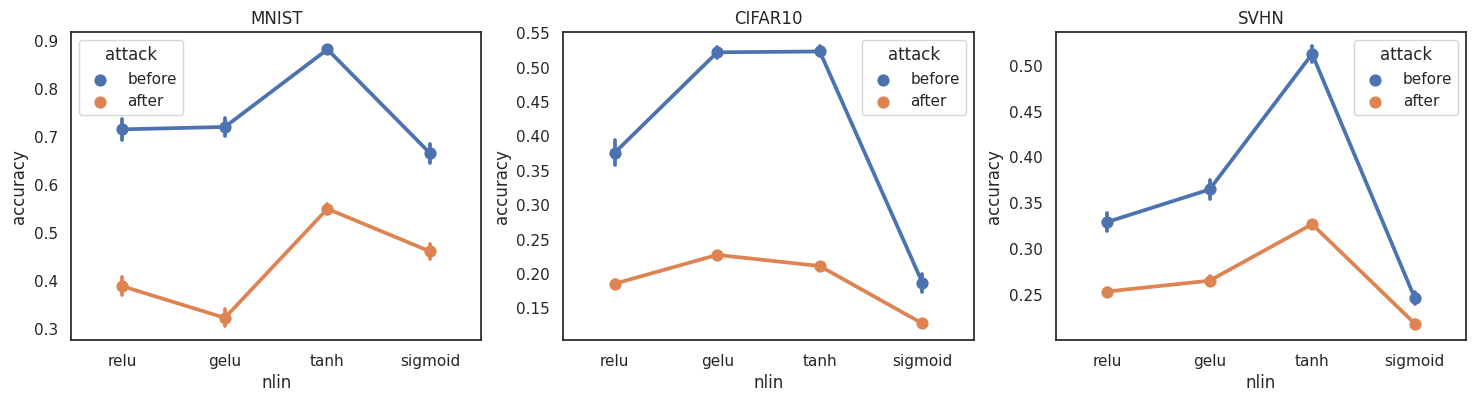

In [280]:
figure, axis = plt.subplots(1, 3, figsize=(18,4))

variable = "nlin"
order = ["relu", "gelu", "tanh", "sigmoid"]

# sns.set_theme(style="white", font_scale=1.0)
g1 = sns.pointplot(ax=axis[0], data=df_mnist2, x=variable, y="accuracy", hue="attack", order=order)
g1.set_title(ds_list[0])
g2 = sns.pointplot(ax=axis[1], data=df_cifar2, x=variable, y="accuracy", hue="attack", order=order)
g2.set_title(ds_list[1])
g3 = sns.pointplot(ax=axis[2], data=df_svhn2, x=variable, y="accuracy", hue="attack", order=order)
g3.set_title(ds_list[2])
# g1.tick_params(labelsize=7)
plt.show()

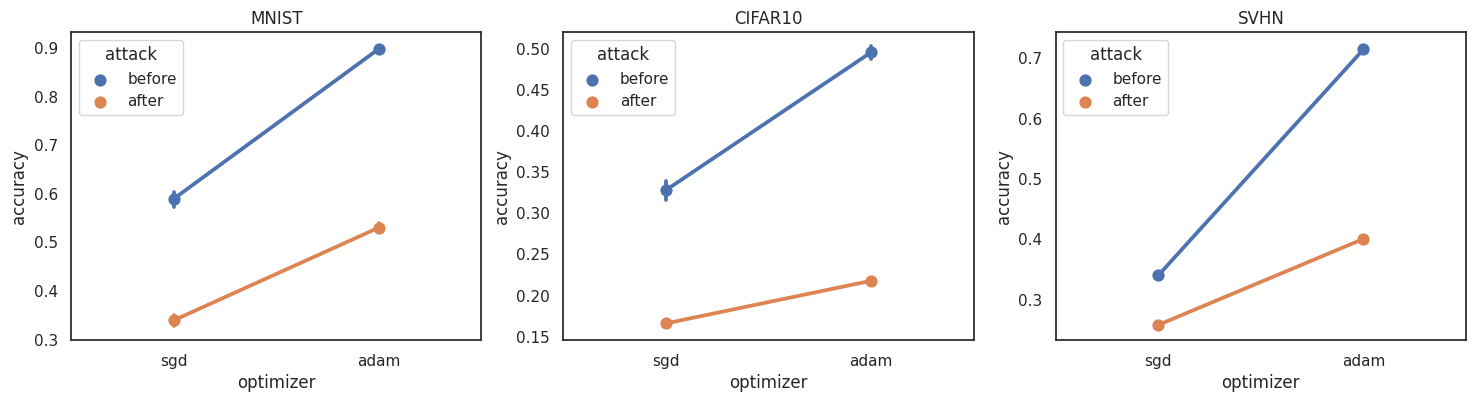

In [281]:
figure, axis = plt.subplots(1, 3, figsize=(18,4))

variable = "optimizer"
order = ["sgd", "adam"]

# sns.set_theme(style="white", font_scale=1.0)
g1 = sns.pointplot(ax=axis[0], data=df_mnist2, x=variable, y="accuracy", hue="attack", order=order)
g1.set_title(ds_list[0])
g2 = sns.pointplot(ax=axis[1], data=df_cifar2, x=variable, y="accuracy", hue="attack", order=order)
g2.set_title(ds_list[1])
g3 = sns.pointplot(ax=axis[2], data=df_svhn2, x=variable, y="accuracy", hue="attack", order=order)
g3.set_title(ds_list[2])
# g1.tick_params(labelsize=7)
plt.show()

## 7.2. Delta Differences

In [257]:
ds = "MNIST"
ds_list = ["MNIST", "CIFAR10", "SVHN"]
attack = "PGD"
setup = "hyp-10-f"
eps = 0.1

data["delta"] = data.old_acc - data.new_acc

df_mnist = data[(df.dataset==ds_list[0]) & (data.attack==attack) & (data.eps==eps) & (data.setup==setup)]
df_cifar = data[(df.dataset==ds_list[1]) & (data.attack==attack) & (data.eps==eps) & (data.setup==setup)]
df_svhn = data[(df.dataset==ds_list[2]) & (data.attack==attack) & (data.eps==eps) & (data.setup==setup)]

In [258]:
df1 = df_mnist[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "old_acc", "delta"]].reset_index(drop=True)
df2 = df_mnist[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "new_acc", "delta"]].reset_index(drop=True)
df1["attack"] = "before"
df2["attack"] = "after"
df1 = df1.rename(columns={"old_acc": "accuracy"})
df2 = df2.rename(columns={"new_acc": "accuracy"})
df_mnist2 = pd.concat([df1, df2])

In [259]:
df1 = df_cifar[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "old_acc", "delta"]].reset_index(drop=True)
df2 = df_cifar[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "new_acc", "delta"]].reset_index(drop=True)
df1["attack"] = "before"
df2["attack"] = "after"
df1 = df1.rename(columns={"old_acc": "accuracy"})
df2 = df2.rename(columns={"new_acc": "accuracy"})
df_cifar2 = pd.concat([df1, df2])

In [260]:
df1 = df_svhn[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "old_acc", "delta"]].reset_index(drop=True)
df2 = df_svhn[["dataset", "dropout", "init_type", "nlin", "lr", "optimizer", "new_acc", "delta"]].reset_index(drop=True)
df1["attack"] = "before"
df2["attack"] = "after"
df1 = df1.rename(columns={"old_acc": "accuracy"})
df2 = df2.rename(columns={"new_acc": "accuracy"})
df_svhn2 = pd.concat([df1, df2])

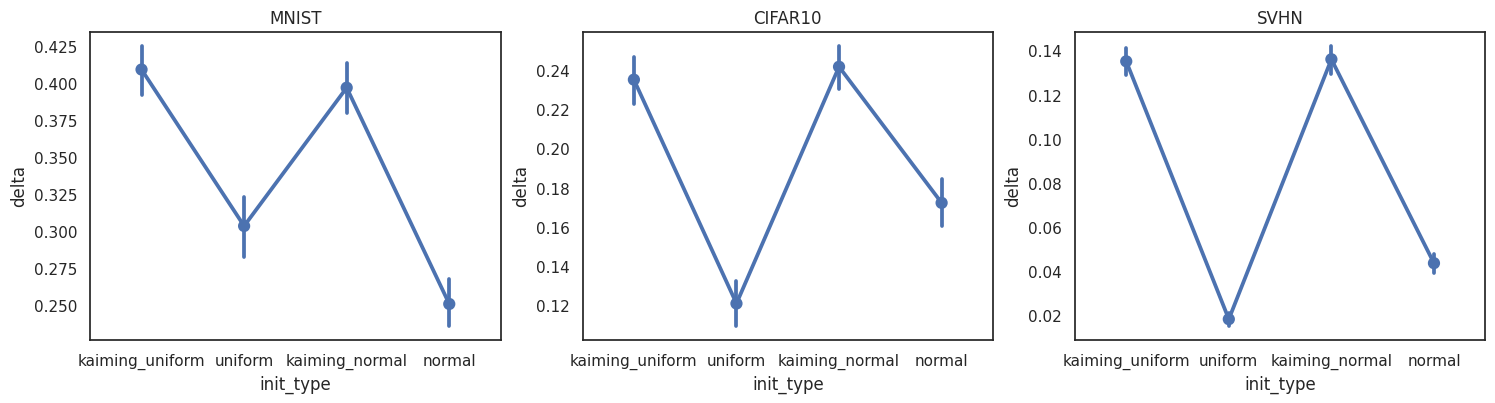

In [264]:
figure, axis = plt.subplots(1, 3, figsize=(18,4))

variable = "init_type"
order = ["kaiming_uniform", "uniform", "kaiming_normal", "normal"]

# sns.set_theme(style="white", font_scale=1.0)
g1 = sns.pointplot(ax=axis[0], data=df_mnist2, x=variable, y="delta", order=order, dodge=True)
g1.set_title(ds_list[0])
g2 = sns.pointplot(ax=axis[1], data=df_cifar2, x=variable, y="delta", order=order, dodge=True)
g2.set_title(ds_list[1])
g3 = sns.pointplot(ax=axis[2], data=df_svhn2, x=variable, y="delta", order=order, dodge=True)
g3.set_title(ds_list[2])
# g1.tick_params(labelsize=7)
plt.show()

# 8. Soup Plots

In [318]:
type = "normal"
ds = "CIFAR10"
setup = "hyp-10-r"

df = pd.read_csv(f"../../results/soups/{type}_{ds}_{s}_df.csv", index_col=0)

In [320]:
df.loc[0, "soup_acc"]

0.6004

In [317]:
df.head()

,name,normal_acc,normal_acc_attack,soup_acc,soup_acc_attack
0,NN_tune_trainable_da045_00620_620_seed=621_202...,0.585,0.2493,0.6004,0.2456
1,NN_tune_trainable_da045_00951_951_seed=952_202...,0.603,0.2507,0.6155,0.2512
2,NN_tune_trainable_da045_00436_436_seed=437_202...,0.589,0.2533,0.6071,0.2541
3,NN_tune_trainable_da045_00819_819_seed=820_202...,0.600,0.2569,0.6126,0.2546
4,NN_tune_trainable_da045_00745_745_seed=746_202...,0.602,0.2476,0.6221,0.2575


In [308]:
df = df.sort_values(by="normal_acc", ascending=False).iloc[:int(len(df)/2), :]

In [310]:
print(df.normal_acc.mean())
print(df.soup_acc.mean())
print(df.normal_acc_attack.mean())
print(df.soup_acc_attack.mean())

0.9691742187500001
0.9710779687500001
0.5285251562500001
0.538046875


In [321]:
type_list = ["normal", "resnet"]
ds_list_normal = ["MNIST", "CIFAR10", "SVHN"]
ds_list_resnet = ["CIFAR10", "CIFAR100", "TinyImageNet"]
setup_list = ["hyp-10-f", "hyp-10-r", "seed"]

for type in type_list:
    if type == "normal":
        for ds in ds_list_normal:
            for s in setup_list:
                df = pd.read_csv(f"../../results/soups/{type}_{ds}_{setup}_df.csv", index_col=0)
                #df = df.sort_values(by="normal_acc", ascending=False).iloc[:int(len(df)/2), :]
                
                print(f"[{type}][{ds}][{s}]{df.normal_acc.mean(): .4f} - {df.soup_acc.mean(): .4f} - {df.normal_acc_attack.mean(): .4f} - {df.soup_acc_attack.mean(): .4f}")
                
    else:
        for ds in ds_list_resnet:
            df = pd.read_csv(f"../../results/soups/{type}_{ds}_seed_df.csv", index_col=0)
            #df = df.sort_values(by="normal_acc", ascending=False).iloc[:int(len(df)/2), :]
            
            print(f"[{type}][{ds}]{df.normal_acc.mean(): .4f} - {df.soup_acc.mean(): .4f} - {df.normal_acc_attack.mean(): .4f} - {df.soup_acc_attack.mean(): .4f}")

[normal][MNIST][hyp-10-f] 0.7410 -  0.7417 -  0.3922 -  0.3966
[normal][MNIST][hyp-10-r] 0.7410 -  0.7417 -  0.3922 -  0.3966
[normal][MNIST][seed] 0.7410 -  0.7417 -  0.3922 -  0.3966
[normal][CIFAR10][hyp-10-f] 0.3716 -  0.3786 -  0.1771 -  0.1823
[normal][CIFAR10][hyp-10-r] 0.3716 -  0.3786 -  0.1771 -  0.1823
[normal][CIFAR10][seed] 0.3716 -  0.3786 -  0.1771 -  0.1823
[normal][SVHN][hyp-10-f] 0.3401 -  0.3462 -  0.2594 -  0.2623
[normal][SVHN][hyp-10-r] 0.3401 -  0.3462 -  0.2594 -  0.2623
[normal][SVHN][seed] 0.3401 -  0.3462 -  0.2594 -  0.2623
[resnet][CIFAR10] 0.9209 -  0.9214 -  0.2622 -  0.2626
[resnet][CIFAR100] 0.6940 -  0.7418 -  0.1280 -  0.1282
[resnet][TinyImageNet] 0.5618 -  0.6401 -  0.0862 -  0.0877


<Axes: >

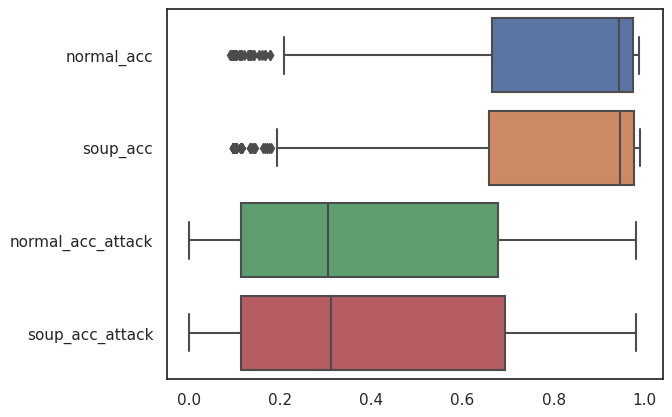

In [306]:
sns.boxplot(df[["normal_acc", "soup_acc", "normal_acc_attack", "soup_acc_attack"]], orient="h")

# 9. Transferability Plots

In [350]:
ds = "MNIST"
setup = "hyp-10-f"

df = pd.read_csv(f"../../results/transferability/dataframes/{ds}_{setup}_df.csv")
df = df[["acc_avg", "loss_avg", "n_models", "config/experiment"]]

In [351]:
scenarios = df["config/experiment"].tolist()

In [352]:
ds_list = ["MNIST", "CIFAR10", "SVHN"]
setups = ["hyp-10-r", "hyp-10-f"]

temp_df = pd.DataFrame()
temp_df["scenarios"] = scenarios
for ds in ds_list:
    for s in setups:
        
        df = pd.read_csv(f"../../results/transferability/dataframes/{ds}_{s}_df.csv")
        
        temp_df[f"{ds}_{s}_acc"] = df["acc_avg"]

In [353]:
temp_df

,scenarios,MNIST_hyp-10-r_acc,MNIST_hyp-10-f_acc,CIFAR10_hyp-10-r_acc,CIFAR10_hyp-10-f_acc,SVHN_hyp-10-r_acc,SVHN_hyp-10-f_acc
0,normal,0.987500,0.987600,0.698100,0.702300,0.851068,0.852412
1,white_box,0.964800,0.764700,0.184300,0.225200,0.059350,0.046174
2,black_box_1,0.117700,0.137495,0.203520,0.138555,0.246975,0.287052
3,black_box_2,0.398220,0.345900,0.290745,0.214815,0.202622,0.235574
4,black_box_3,0.502440,0.913770,0.198597,0.234942,0.236338,0.284306
5,black_box_4,0.800302,0.613628,0.266588,0.234262,0.199243,0.223251
6,black_box_5,0.548733,0.714782,NaN,NaN,0.221288,0.300898


In [354]:
scenarios

['normal',
 'white_box',
 'black_box_1',
 'black_box_2',
 'black_box_3',
 'black_box_4',
 'black_box_5']